In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from datasets import Dataset

# Create a pandas DataFrame
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt



In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/emotion detection in text/dataset

/content/drive/MyDrive/emotion detection in text/dataset


In [ ]:
cd datasettxt

/content/drive/MyDrive/emotion detection in text/dataset/datasettxt


In [ ]:
ls

 anger.txt
 FinalDatasetwithpeprosing.csv
 love.txt
 new_csv_file_withnewdata_drop1111.csv
 new_csv_file_withnewdata_drop1111.gsheet
 new_csv_file_withnewdata_drop222.csv
'sentences (1).gsheet'
 sentences.csv
 sentences.gsheet
 tweet_emotions.csv


In [ ]:
!unzip tweet_emotions.csv.zip -d dataset

Archive:  tweet_emotions.csv.zip
  inflating: dataset/tweet_emotions.csv  


In [ ]:
ls

tweet_emotions.csv  tweet_emotions.gsheet


In [ ]:
df = pd.read_csv('FinalDatasetwithpeprosing.csv')

In [ ]:
# Drop any rows with null values in the 'sentiment' or 'content' columns
df = df.dropna(subset=['sentiment', 'content'])

# Print the updated dataset shape
print(df.shape)

(15291, 2)


In [ ]:
df.head()

,content,sentiment
0,It is so annoying when she starts typing on he...,anger
1,dammit! hulu desktop has totally screwed up my...,anger
2,@ cayogial i wanted to come to BZ this summer ...,anger
3,You win ... SIGH Rakeem,anger
4,"Damn, that sucks",anger


In [ ]:
labels = df['sentiment'].value_counts()

anger        2187
happiness    2187
sadness      2187
surprise     2187
love         2186
worry        2186
neutral      2171
Name: sentiment, dtype: int64

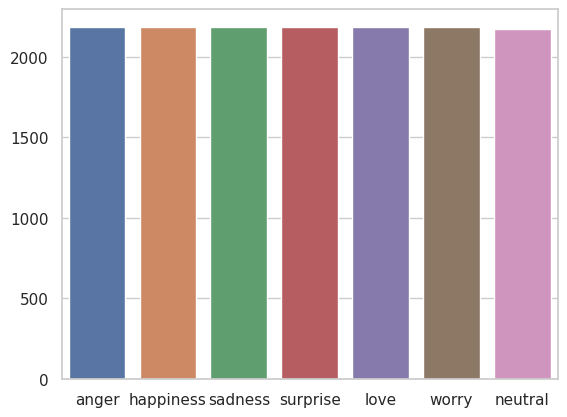

In [ ]:
## pie chart of the distribution of the dialects
count_values = df['sentiment'].value_counts()
sns.set(style="whitegrid")
sns.barplot(x=count_values.index,y=count_values.values)
count_values

In [ ]:
labels.index

Index(['anger', 'happiness', 'sadness', 'surprise', 'love', 'worry',
       'neutral'],
      dtype='object')

In [ ]:
import re

def remove_hashtags(text):
    text = re.sub(r'@\w+', '', text)
    return text

def remove_emojis(text):
    text = [x for x in text.split(' ') if x.isalpha()]
    text = ' '.join(text)
    return text

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_urls(text):
    text = re.sub(r'http\S+', '', text)
    return text

def preprocess(text):
    if isinstance(text, str):
        text = remove_hashtags(text)
        text = remove_emoji(text)
        text = remove_urls(text)
    return text

df['content'] = df['content'].apply(preprocess)


In [ ]:
df_data=pd.DataFrame(columns=['content','sentiment'])
for i in np.unique(df['sentiment']):
    temp=df.loc[df['sentiment']==i]
    print(temp.shape)
    df_data=df_data.append(temp,ignore_index=True)
    
X=df_data['content']
Y=df_data['sentiment']
df_data.shape

enc=LabelEncoder()
Y=enc.fit_transform(Y)

(2187, 2)
(2187, 2)
(2186, 2)
(2171, 2)
(2187, 2)
(2187, 2)
(2186, 2)


<ipython-input-14-16fc7786d711>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data=df_data.append(temp,ignore_index=True)


anger        2187
happiness    2187
sadness      2187
surprise     2187
love         2186
worry        2186
neutral      2171
Name: sentiment, dtype: int64

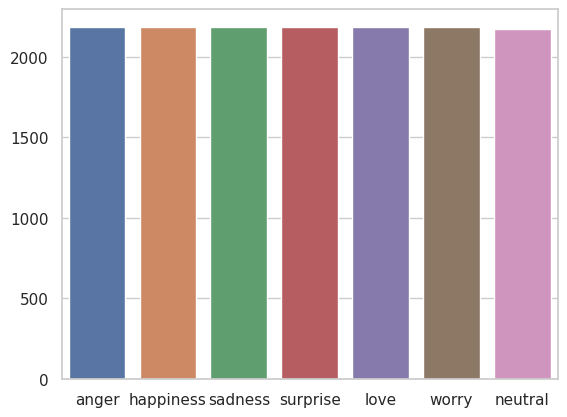

In [ ]:
## pie chart of the distribution of the dialects
count_values = df_data['sentiment'].value_counts()
sns.set(style="whitegrid")
sns.barplot(x=count_values.index,y=count_values.values)
count_values

In [ ]:
X_train , X_test ,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns

def train_model(model, data, targets):
    text_clf = Pipeline([
    ('vect', CountVectorizer(analyzer='word',ngram_range=(4,7),stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', model),
    ])
    text_clf.fit(data, targets)
    return text_clf
def get_accuracy(trained_model,X, y):
    predicted = trained_model.predict(X)
    accuracy = np.mean(predicted == y)
    return accuracy
def get_report(trained_model,X, y):
    plt.figure(figsize=(10,10))
    predicted = trained_model.predict(X)
    cr = classification_report(y,predicted,target_names=enc.classes_)
    cm=confusion_matrix(y,predicted)
    df_cm=pd.DataFrame(cm,index=enc.classes_)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g') # font size
    plt.show()
    print(cr)

Test dataset accuracy with LogisticRegression: 0.15


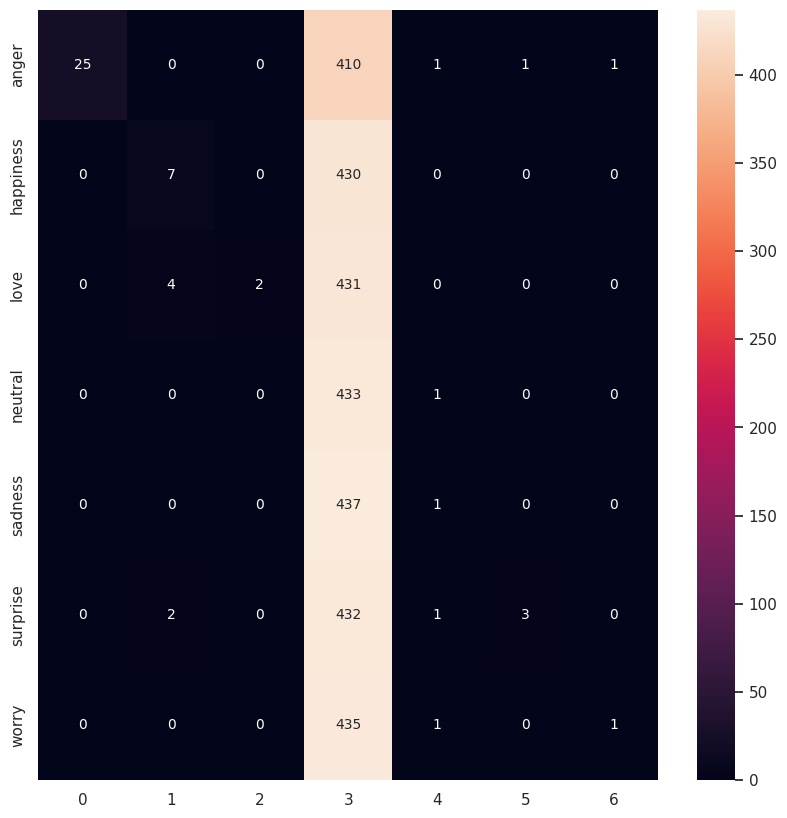

              precision    recall  f1-score   support

       anger       1.00      0.06      0.11       438
   happiness       0.54      0.02      0.03       437
        love       1.00      0.00      0.01       437
     neutral       0.14      1.00      0.25       434
     sadness       0.20      0.00      0.00       438
    surprise       0.75      0.01      0.01       438
       worry       0.50      0.00      0.00       437

    accuracy                           0.15      3059
   macro avg       0.59      0.16      0.06      3059
weighted avg       0.59      0.15      0.06      3059



In [ ]:
from sklearn.linear_model import LogisticRegression
trained_clf_LogisticRegression = train_model(LogisticRegression(), X_train, y_train)
accuracy = get_accuracy(trained_clf_LogisticRegression,X_test, y_test)
print(f"Test dataset accuracy with LogisticRegression: {accuracy:.2f}")
get_report(trained_clf_LogisticRegression,X_test, y_test)

Test dataset accuracy with LinearSVC: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


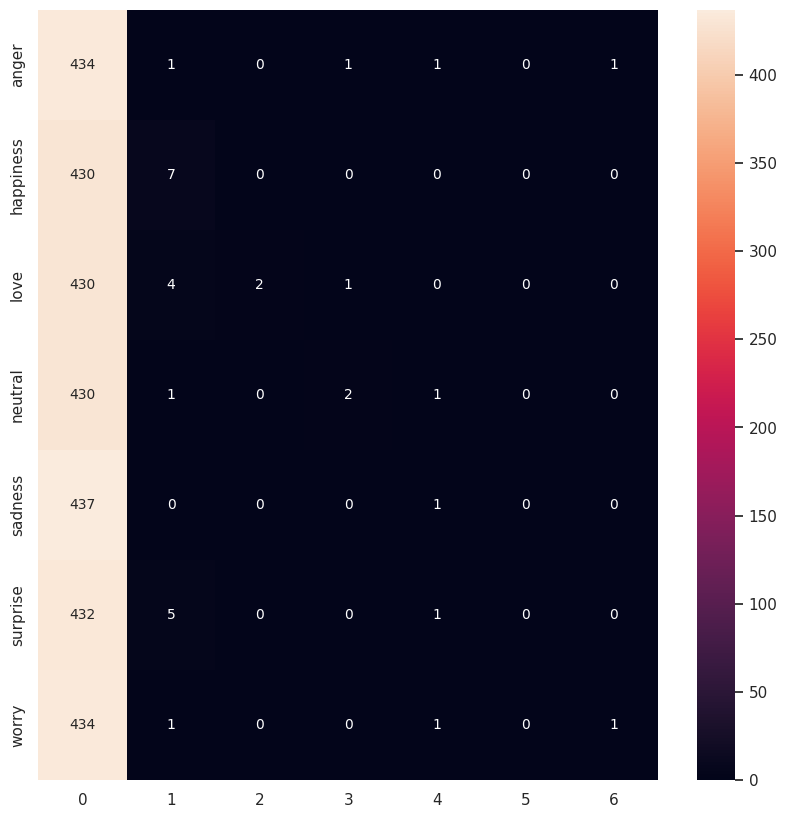

              precision    recall  f1-score   support

       anger       0.14      0.99      0.25       438
   happiness       0.37      0.02      0.03       437
        love       1.00      0.00      0.01       437
     neutral       0.50      0.00      0.01       434
     sadness       0.20      0.00      0.00       438
    surprise       0.00      0.00      0.00       438
       worry       0.50      0.00      0.00       437

    accuracy                           0.15      3059
   macro avg       0.39      0.15      0.04      3059
weighted avg       0.39      0.15      0.04      3059



In [ ]:
from sklearn.svm import SVC
trained_clf_linearSVC = train_model(SVC(), X_train, y_train)
accuracy = get_accuracy(trained_clf_linearSVC,X_test, y_test)
print(f"Test dataset accuracy with LinearSVC: {accuracy:.2f}")
get_report(trained_clf_linearSVC,X_test, y_test)

Iteration 1, loss = 1.94942837
Iteration 2, loss = 1.83051355
Iteration 3, loss = 1.45254416
Test dataset accuracy with MLPClassifier: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


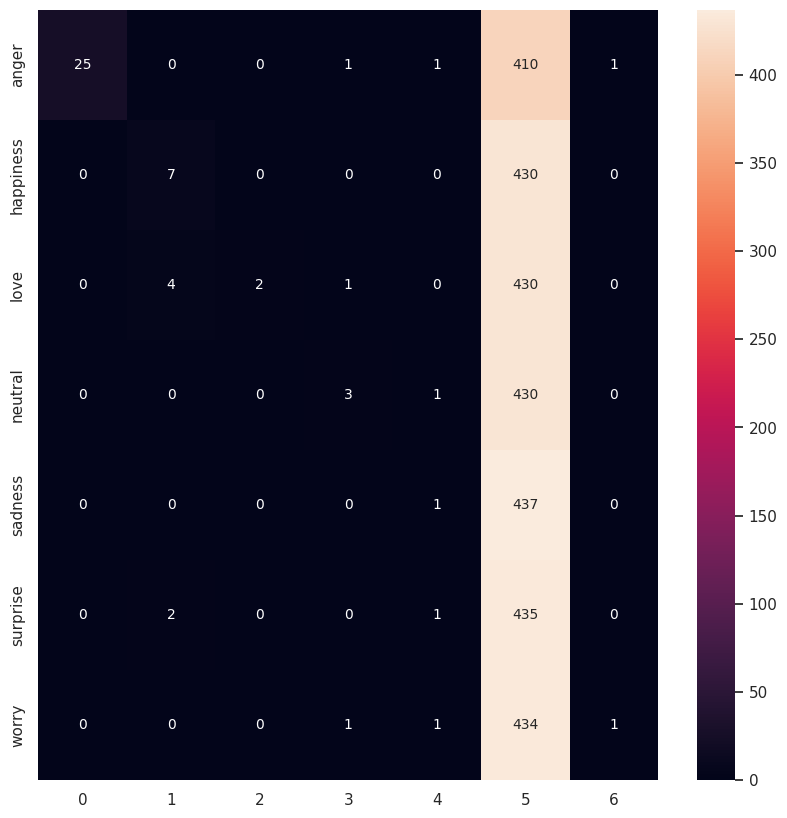

              precision    recall  f1-score   support

       anger       1.00      0.06      0.11       438
   happiness       0.54      0.02      0.03       437
        love       1.00      0.00      0.01       437
     neutral       0.50      0.01      0.01       434
     sadness       0.20      0.00      0.00       438
    surprise       0.14      0.99      0.25       438
       worry       0.50      0.00      0.00       437

    accuracy                           0.15      3059
   macro avg       0.55      0.15      0.06      3059
weighted avg       0.55      0.15      0.06      3059



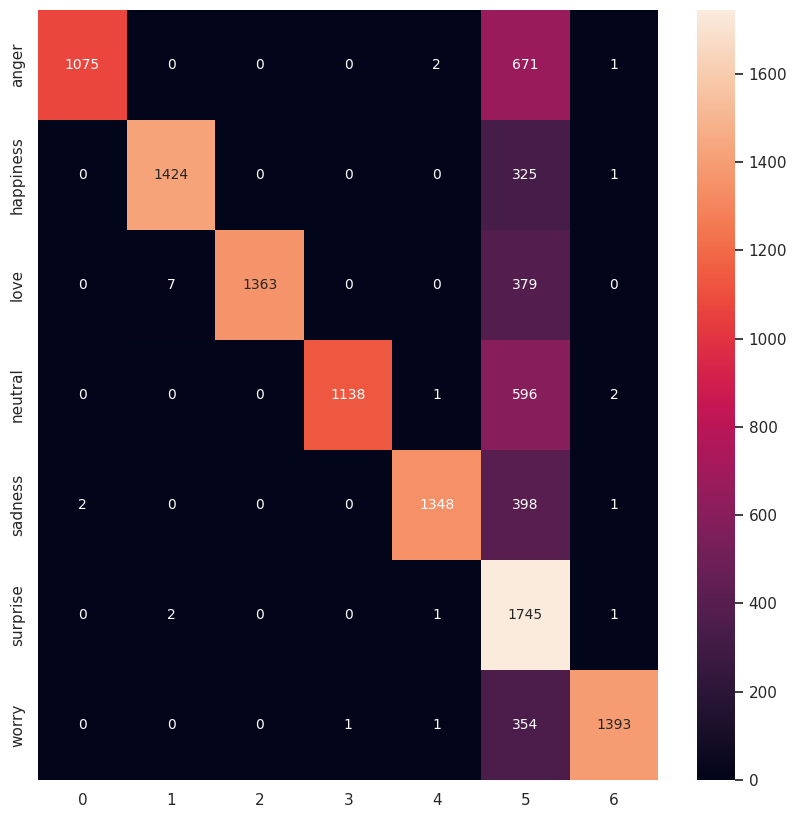

              precision    recall  f1-score   support

       anger       1.00      0.61      0.76      1749
   happiness       0.99      0.81      0.89      1750
        love       1.00      0.78      0.88      1749
     neutral       1.00      0.66      0.79      1737
     sadness       1.00      0.77      0.87      1749
    surprise       0.39      1.00      0.56      1749
       worry       1.00      0.80      0.89      1749

    accuracy                           0.78     12232
   macro avg       0.91      0.78      0.81     12232
weighted avg       0.91      0.78      0.81     12232



In [ ]:
from sklearn.neural_network import MLPClassifier
trained_clf_MLPClassifier = train_model(MLPClassifier(verbose=1,max_iter=3,validation_fraction=0.1), X_train, y_train)
accuracy = get_accuracy(trained_clf_MLPClassifier,X_test, y_test)
print(f"Test dataset accuracy with MLPClassifier: {accuracy:.2f}")
get_report(trained_clf_MLPClassifier,X_test, y_test)
get_report(trained_clf_MLPClassifier,X_train, y_train)

Test dataset accuracy with MLPClassifier: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


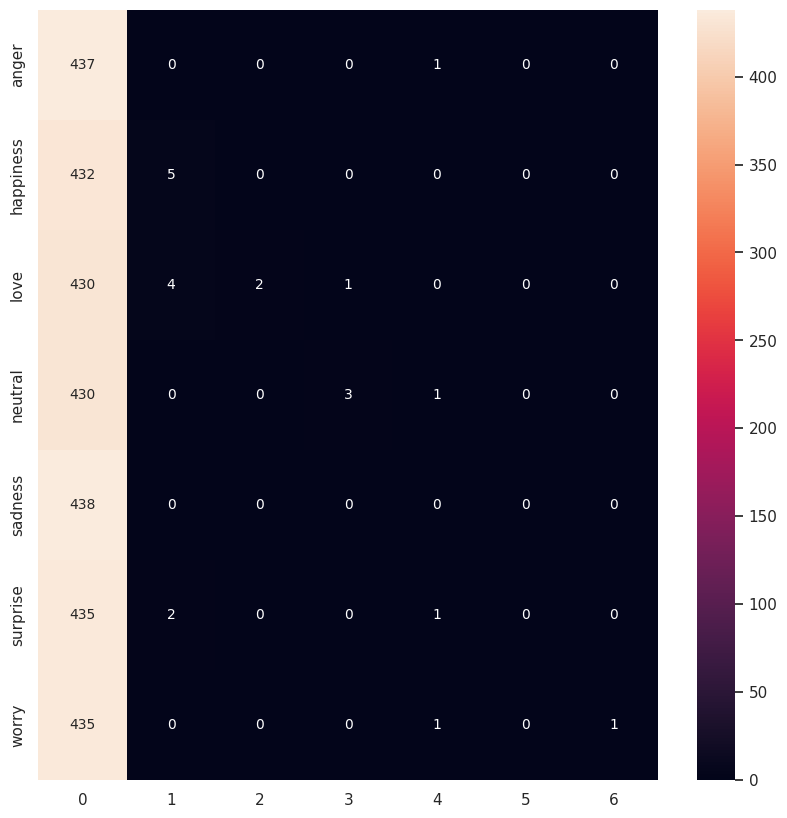

              precision    recall  f1-score   support

       anger       0.14      1.00      0.25       438
   happiness       0.45      0.01      0.02       437
        love       1.00      0.00      0.01       437
     neutral       0.75      0.01      0.01       434
     sadness       0.00      0.00      0.00       438
    surprise       0.00      0.00      0.00       438
       worry       1.00      0.00      0.00       437

    accuracy                           0.15      3059
   macro avg       0.48      0.15      0.04      3059
weighted avg       0.48      0.15      0.04      3059



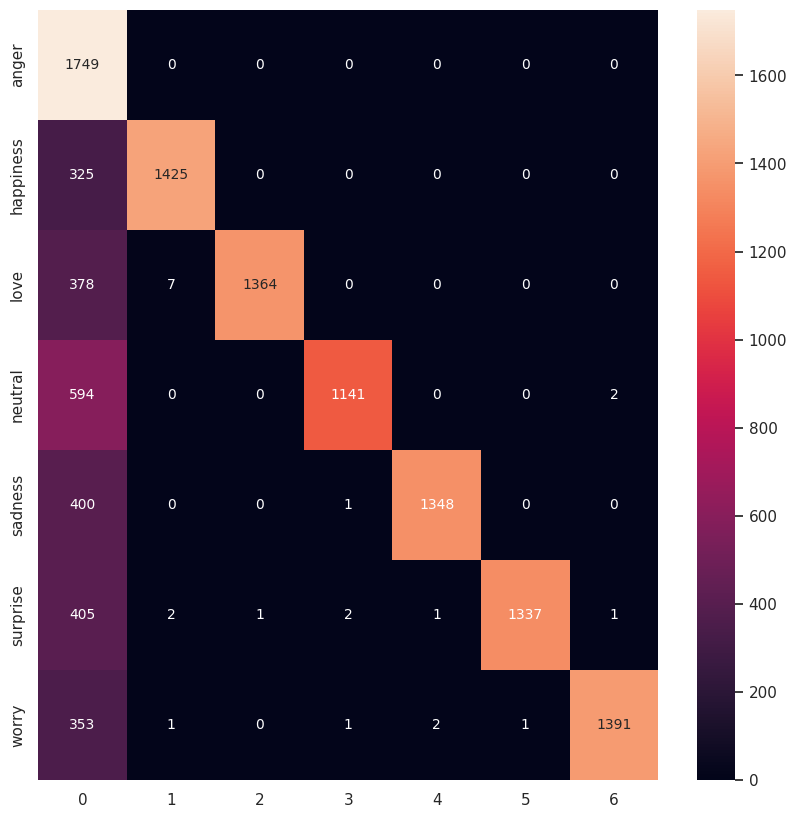

              precision    recall  f1-score   support

       anger       0.42      1.00      0.59      1749
   happiness       0.99      0.81      0.89      1750
        love       1.00      0.78      0.88      1749
     neutral       1.00      0.66      0.79      1737
     sadness       1.00      0.77      0.87      1749
    surprise       1.00      0.76      0.87      1749
       worry       1.00      0.80      0.89      1749

    accuracy                           0.80     12232
   macro avg       0.91      0.80      0.82     12232
weighted avg       0.91      0.80      0.82     12232



In [ ]:
from sklearn.tree import DecisionTreeClassifier
trained_clf_DT = train_model(DecisionTreeClassifier(), X_train, y_train)
accuracy = get_accuracy(trained_clf_DT,X_test, y_test)
print(f"Test dataset accuracy with MLPClassifier: {accuracy:.2f}")
get_report(trained_clf_DT,X_test, y_test)
get_report(trained_clf_DT,X_train, y_train)

Test dataset accuracy with MLPClassifier: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


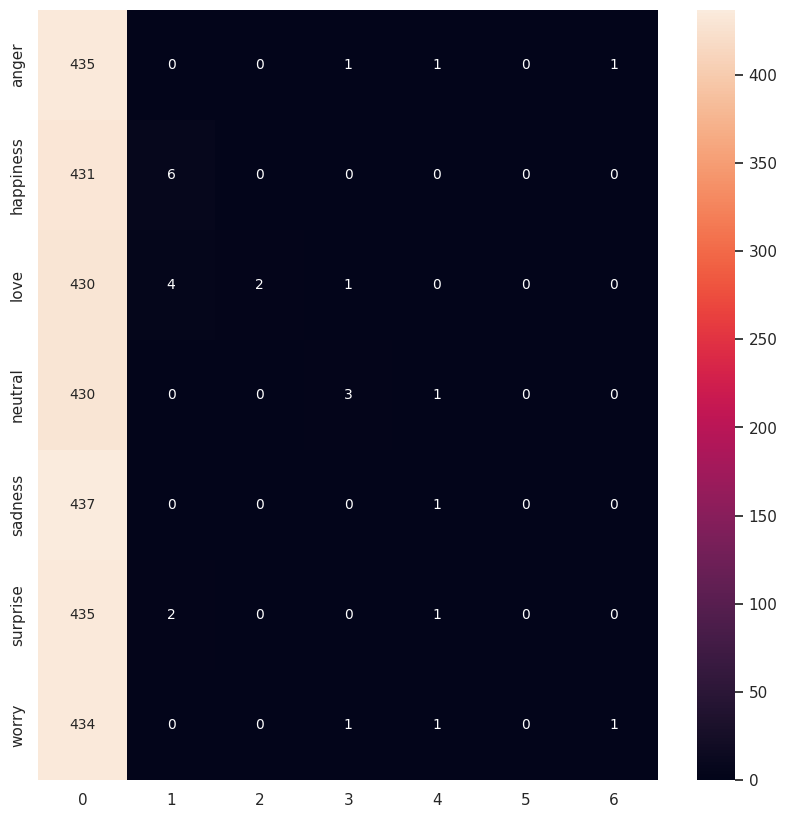

              precision    recall  f1-score   support

       anger       0.14      0.99      0.25       438
   happiness       0.50      0.01      0.03       437
        love       1.00      0.00      0.01       437
     neutral       0.50      0.01      0.01       434
     sadness       0.20      0.00      0.00       438
    surprise       0.00      0.00      0.00       438
       worry       0.50      0.00      0.00       437

    accuracy                           0.15      3059
   macro avg       0.41      0.15      0.04      3059
weighted avg       0.41      0.15      0.04      3059



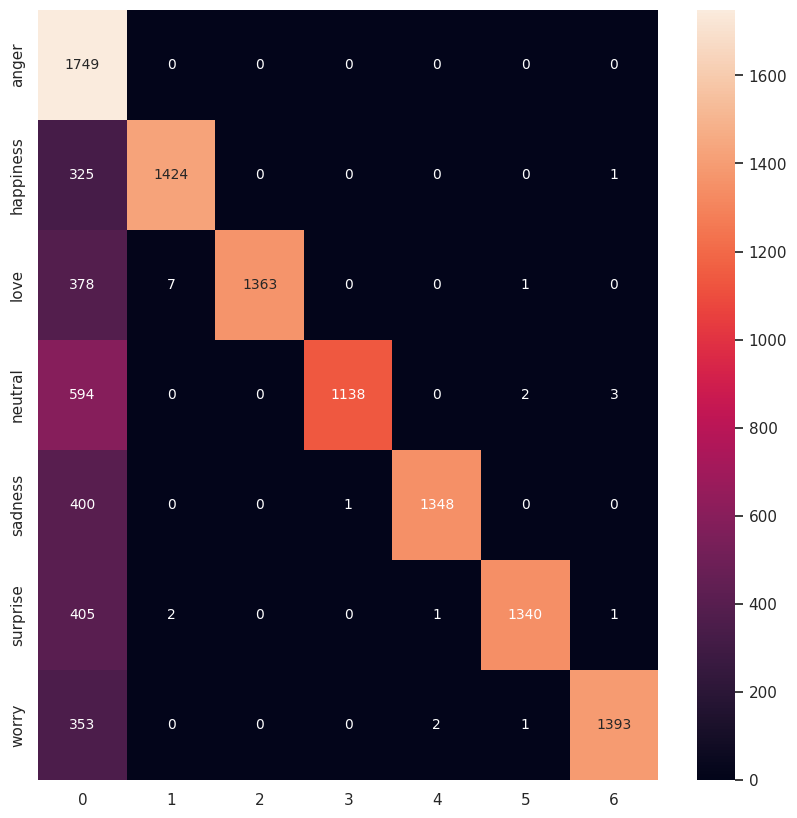

              precision    recall  f1-score   support

       anger       0.42      1.00      0.59      1749
   happiness       0.99      0.81      0.89      1750
        love       1.00      0.78      0.88      1749
     neutral       1.00      0.66      0.79      1737
     sadness       1.00      0.77      0.87      1749
    surprise       1.00      0.77      0.87      1749
       worry       1.00      0.80      0.89      1749

    accuracy                           0.80     12232
   macro avg       0.91      0.80      0.82     12232
weighted avg       0.91      0.80      0.82     12232



In [ ]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_RF = train_model(RandomForestClassifier(n_estimators=200), X_train, y_train)
accuracy = get_accuracy(trained_clf_RF,X_test, y_test)
print(f"Test dataset accuracy with MLPClassifier: {accuracy:.2f}")
get_report(trained_clf_RF,X_test, y_test)
get_report(trained_clf_RF,X_train, y_train)

In [ ]:
def predict(model, text):
    text = pd.Series(text)
    pred = model.predict(text)
    print(enc.classes_[pred][0])


In [ ]:
# Define the list of trained models
trained_models = [trained_clf_LogisticRegression, trained_clf_linearSVC, trained_clf_DT, trained_clf_MLPClassifier, trained_clf_RF]

# Define the input texts to make predictions on
input_texts = ["My heart feels heavy and I can't seem to shake this sadness.",
               "I'm so excited to see my friends tomorrow!",
               "This movie was terrible, I would not recommend it to anyone."]

# Iterate over each trained model and input text to make predictions
for model in trained_models:
    print(f"Predictions for {type(model).__name__}:")
    for input_text in input_texts:
        predict(model, input_text)
        print()


Predictions for Pipeline:
neutral

neutral

neutral

Predictions for Pipeline:
anger

anger

anger

Predictions for Pipeline:
anger

anger

anger

Predictions for Pipeline:
surprise

surprise

surprise

Predictions for Pipeline:
anger

anger

anger



In [ ]:
predict(trained_clf_LogisticRegression,"My heart feels heavy and I can't seem to shake this sadness." )

neutral


In [ ]:
predict(trained_clf_linearSVC,"My heart feels heavy and I can't seem to shake this sadness." )

anger


In [ ]:
predict(trained_clf_MLPClassifier,"My heart feels heavy and I can't seem to shake this sadness." )

surprise


In [ ]:
predict(trained_clf_DT,"My heart feels heavy and I can't seem to shake this sadness." )

anger


In [ ]:
predict(trained_clf_RF,"My heart feels heavy and I can't seem to shake this sadness." )

anger
